<a href="https://colab.research.google.com/github/br0mabs/data-puzzles-solutions/blob/main/Data_Puzzles_Spring_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

It's Spring Cleaning time!

I have a few audios in my dataset that sound *almost* the same, could you find them for me?

# Kickstart

In [25]:
# get the dataset
!git clone https://github.com/hyperc54/data-puzzles-assets.git

fatal: destination path 'data-puzzles-assets' already exists and is not an empty directory.


In [26]:
dataset_path = './data-puzzles-assets/audio/to_clean'

In [62]:
import os
import IPython.display as ipd

import soundfile as sf
import librosa

import matplotlib.pyplot as plt
import librosa.display


all_audios = []

# load dataset in memory
for filename in os.listdir(dataset_path):
  data, samplerate = sf.read(os.path.join(dataset_path,filename))

  all_audios.append({
      'name': filename,
      'samples': data,
      'samplerate': samplerate
  })

N = len(all_audios)

In [28]:
# Check one of the audios
ipd.Audio(
    all_audios[0]['samples'],
    rate=all_audios[0]['samplerate']
)

In [29]:
all_audios[0]['samples']

array([-0.00061035, -0.00079346, -0.00140381, ..., -0.0005188 ,
       -0.00100708, -0.00073242])

In [30]:
# check the waveform of some samples

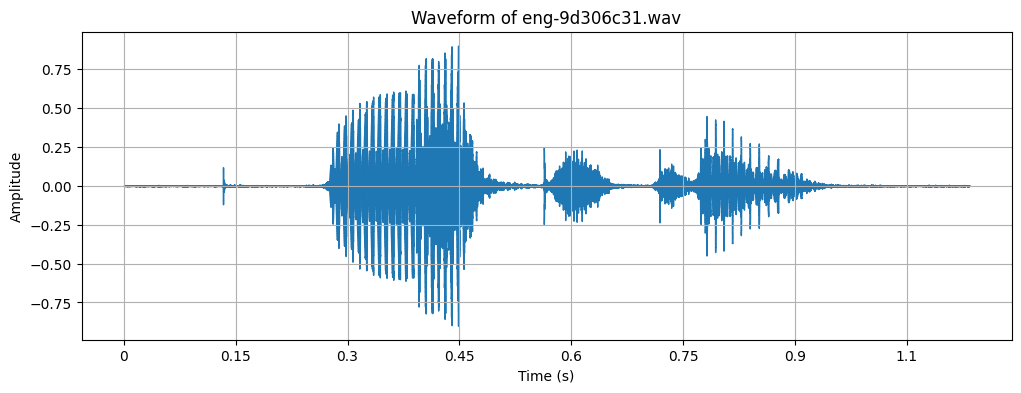

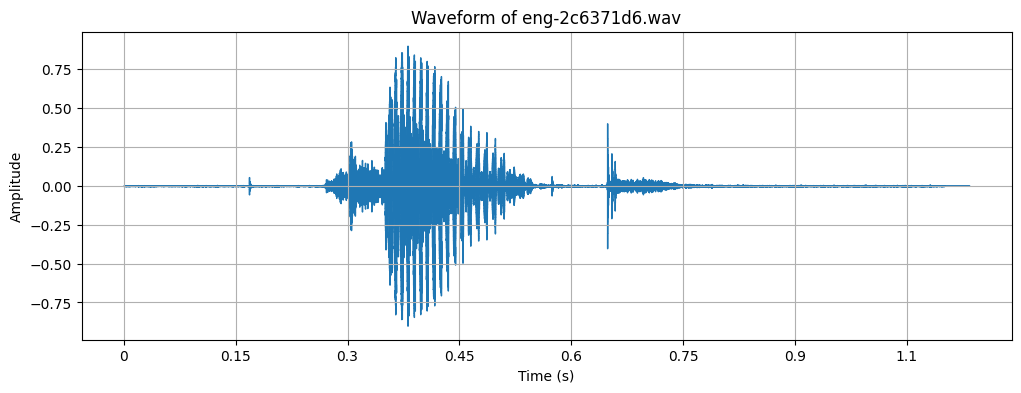

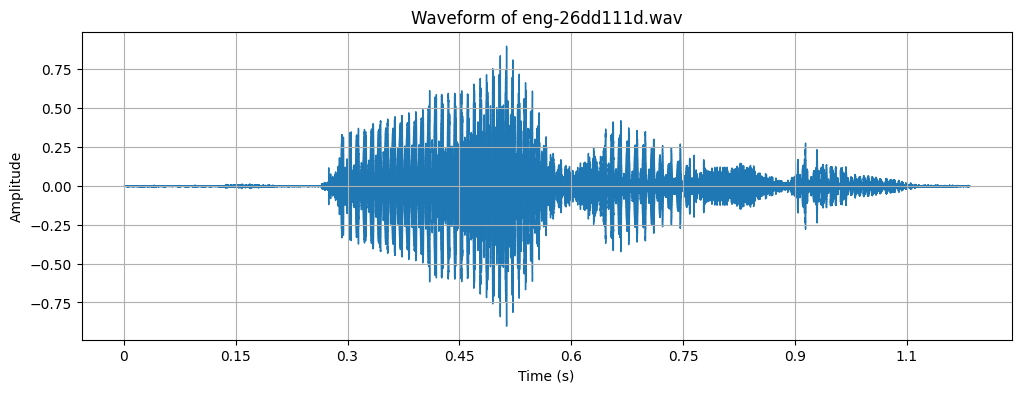

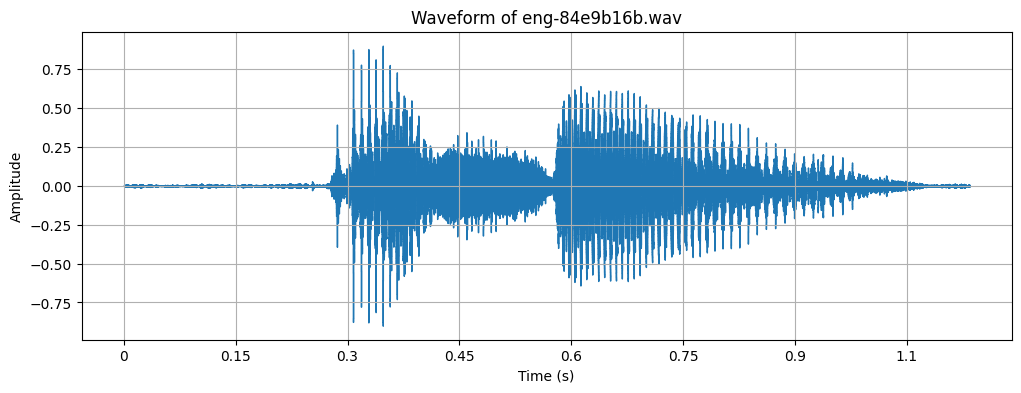

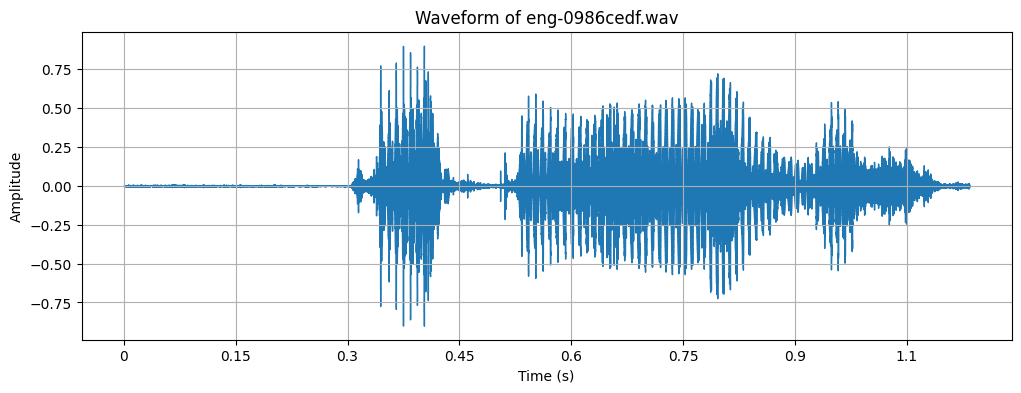

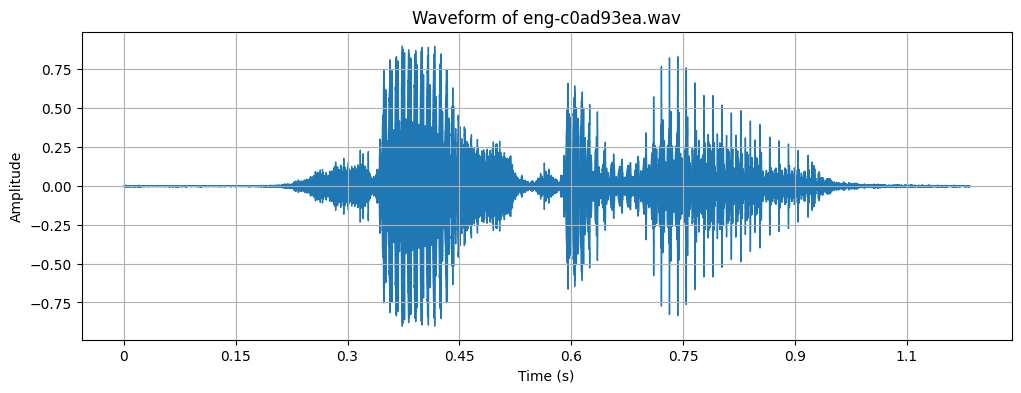

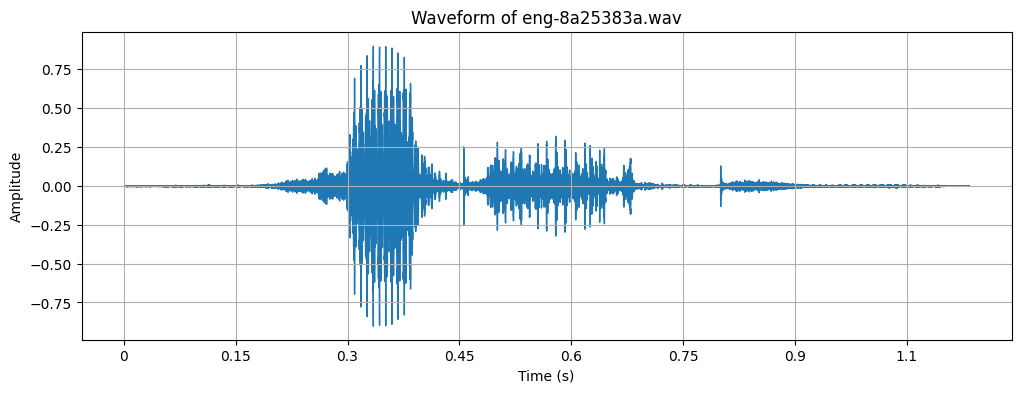

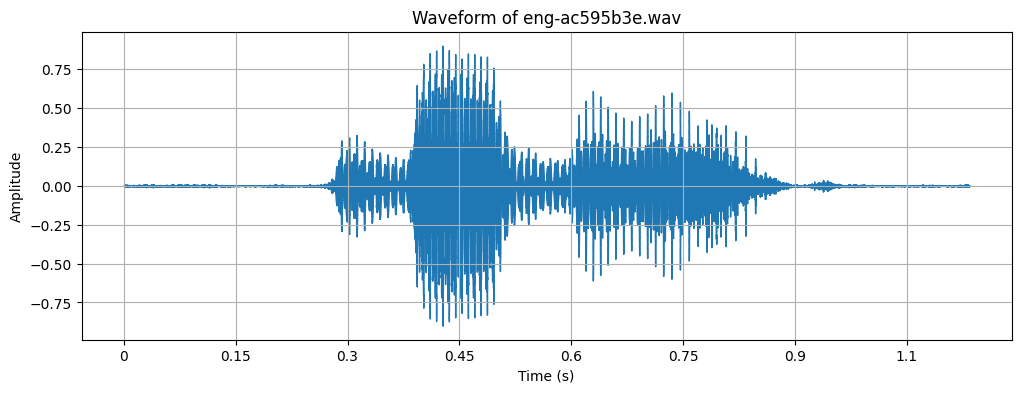

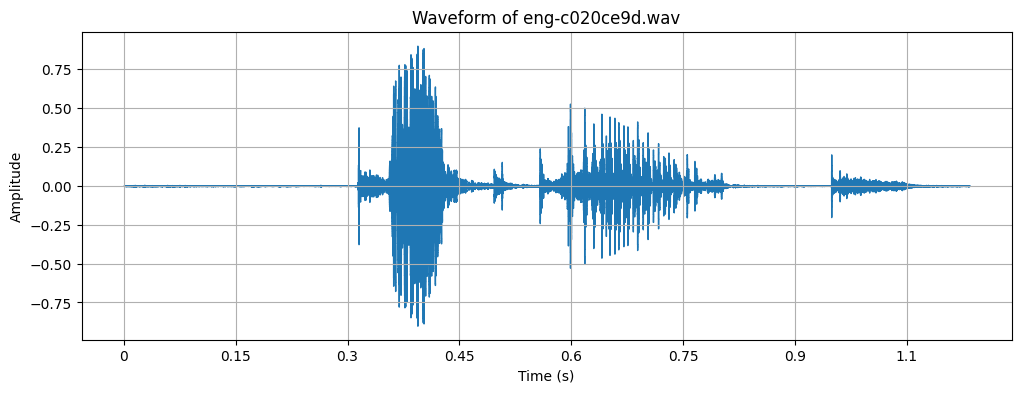

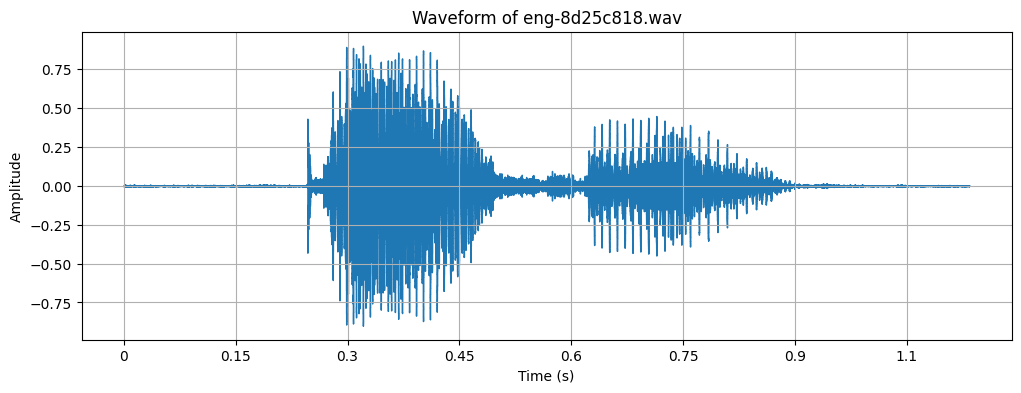

In [31]:
for i in range(10):
  y = all_audios[i]['samples']
  sr = all_audios[i]['samplerate']

  plt.figure(figsize=(12, 4))
  librosa.display.waveshow(y, sr=sr)
  plt.title('Waveform of ' + all_audios[i]['name'])
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.grid(True)
  plt.show()

In [32]:
len(all_audios)

989

In [33]:
# idea is to use euclidean distance between audio files
# convert first to MFCC embedding and then run euclidean distance

# example of MFCC embedding

y = all_audios[0]['samples']
sr = all_audios[0]['samplerate']

arr = librosa.feature.mfcc(y=y, sr=sr)
arr

array([[-5.37122633e+02, -5.20606263e+02, -5.12391633e+02, ...,
        -5.07808868e+02, -5.08063311e+02, -5.11031833e+02],
       [ 5.05517095e+01,  6.65793196e+01,  7.41165726e+01, ...,
         7.85391835e+01,  7.75393892e+01,  7.56604064e+01],
       [ 2.83408653e+01,  3.08763621e+01,  3.32495605e+01, ...,
         3.51526922e+01,  3.41715800e+01,  3.51769857e+01],
       ...,
       [ 9.16431093e+00,  6.50627907e+00,  4.64394969e+00, ...,
        -6.95753955e+00, -7.84426708e+00, -5.36531685e+00],
       [ 1.16457246e+01,  8.20418220e+00,  6.28749760e+00, ...,
        -7.04813023e+00, -5.26752452e+00, -3.83766776e-01],
       [ 8.66974519e+00,  6.09140483e+00,  3.80242261e+00, ...,
        -2.63040715e+00,  2.49527073e-01,  5.06067908e+00]])

In [34]:
arr.shape

(20, 98)

In [49]:
mfcc_embeddings = []
for i in range(len(all_audios)):
  y = all_audios[i]['samples']
  sr = all_audios[i]['samplerate']
  # Compute MFCCs and take the mean across the time axis (axis=1)
  mfcc = librosa.feature.mfcc(y=y, sr=sr).mean(axis=1)
  mfcc_embeddings.append(mfcc)

In [50]:
import numpy as np
euclidean_distance_matrix = np.zeros((len(all_audios), len(all_audios)))
for i in range(len(mfcc_embeddings)):
  for j in range(i + 1, len(mfcc_embeddings)):
    # compute euclidean distance between mean MFCC vectors
    euclidean_distance_matrix[i][j] = np.linalg.norm(mfcc_embeddings[i] - mfcc_embeddings[j], ord=2)

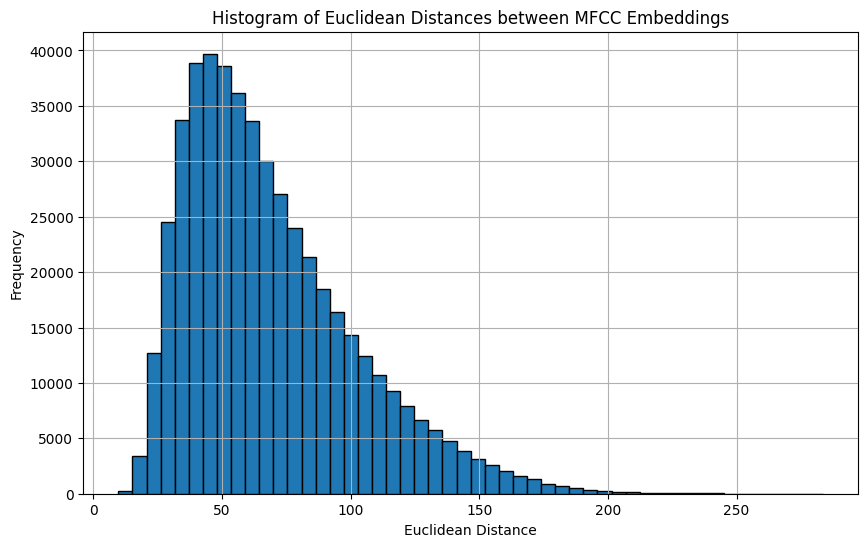

In [51]:
import matplotlib.pyplot as plt

# Flatten the upper triangular part of the matrix (excluding diagonal)
flat_distances = euclidean_distance_matrix[np.triu_indices(len(all_audios), k=1)].flatten()

plt.figure(figsize=(10, 6))
plt.hist(flat_distances, bins=50, edgecolor='black')
plt.title('Histogram of Euclidean Distances between MFCC Embeddings')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [59]:
distances_less_than_500 = flat_distances[flat_distances < 20]
print(distances_less_than_500)

[16.0483988  19.69157409 18.40474565 ... 17.26878439 19.2601252
 19.19198453]


In [60]:
# not very conclusive from above

# sometimes simpler is better?
# try directly measuring the norm

In [63]:
raw_distances = []
for i in range(N):
  for j in range(i + 1, N):
    raw_distances.append(np.linalg.norm(all_audios[i]['samples'] - all_audios[j]['samples']))

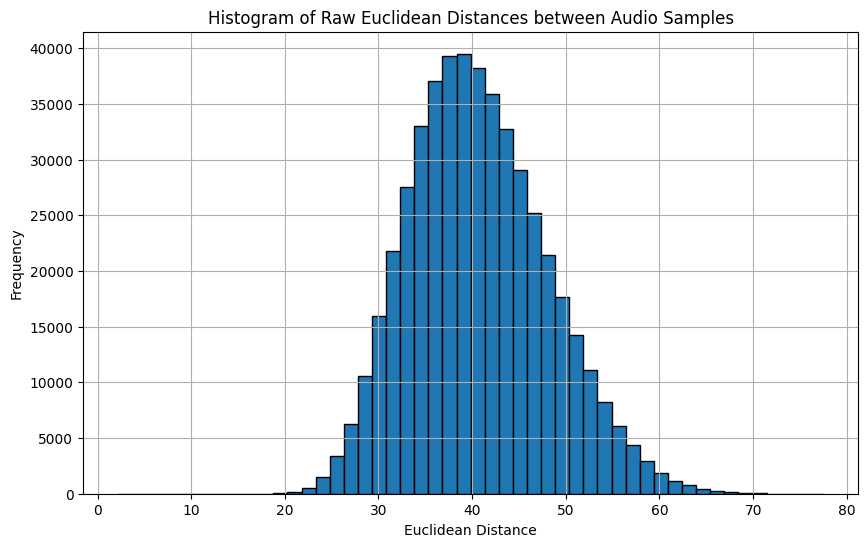

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(raw_distances, bins=50, edgecolor='black')
plt.title('Histogram of Raw Euclidean Distances between Audio Samples')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [73]:
import numpy as np

raw_distances_np = np.array(raw_distances)
special_raw_distances = raw_distances_np[raw_distances_np < 10]
print(special_raw_distances)

[2.24167089 2.24651432 2.22673716]


In [ ]:
# found 3 results that definitely are anomalous

In [74]:
# want to find the specific pairs that generated these, so we run again and extract the pairs

raw_distances = []
for i in range(N):
  for j in range(i + 1, N):
    dist = np.linalg.norm(all_audios[i]['samples'] - all_audios[j]['samples'])
    if dist < 10:
      print(i, j)

173 516
231 429
610 733


In [75]:
# listen to the duplicate audios
ipd.Audio(
    all_audios[173]['samples'],
    rate=all_audios[173]['samplerate']
)

# result: germany

In [80]:
# listen to the duplicate audios
ipd.Audio(
    all_audios[429]['samples'],
    rate=all_audios[429]['samplerate']
)

# result: portugal

In [82]:
# listen to the duplicate audios
ipd.Audio(
    all_audios[733]['samples'],
    rate=all_audios[733]['samplerate']
)

# result: france

In [ ]:
# therefore they are all countries